# Evaluación Parcial 2 - Análisis Exploratorio de Datos
## Curso: FMY0100 - Fundamentos de Machine Learning  
**Integrantes**: [Thiare Gomez, Guillermo Almendra, Andres Calderon]  
**Fecha de entrega**: [01/07/2025]

El presente proyecto tiene como propósito analizar el rendimiento individual de los jugadores en las partidas de CS:GO, utilizando la metodología CRISP-DM. Esta metodología se compone de seis etapas las cuales veremos a lo largo del informe.


## **FASE: Business Understanding**


###Contexto
Counter Strike: Global Offensive (CS:GO) es un videojuego de disparos táctico en primera persona, multijugador y competitivo en el que dos equipos de 5 jugadores, terroristas y contraterroristas, se enfrentan en múltiples rondas dentro de distintos mapas. El equipo terrorista debe plantar una bomba en uno de los sitios designados dentro del mapa, mientras que los contraterroristas deben evitarlo o desactivarla si es que ya fue colocada.
El dataset contiene más de 7.000 partidas de CS:GO, recolectadas a partir de replays oficiales a través de un scrapper. Cada replay fue procesado para extraer información individual por jugador y consolidado en un archivo CSV con 79.157 registros, cada uno correspondiente a un jugador en una partida específica. Los datos contienen 29 variables que permiten caracterizar el comportamiento de los jugadores como:

-**MatchKills, RoundKills**: Número de enemigos eliminados por el jugador en una partida o ronda.

-**MatchAssists, RoundAssists**: Número de veces que el jugador ayudó a eliminar a un enemigo durante una partida o ronda.

-**Survived**: Indica si el jugador sobrevivió o no al final de la partida o ronda.

-**TimeAlive**: Indica el tiempo en el que el jugador estuvo vivo durante la partida.

-**MatchHeadShots, RoundHeadShots**: Número de enemigos eliminados por el jugador a través de un tiro en la cabeza durante la partida o ronda.

-**MatcFlankKills, RoundFlankKills**: Número de enemigos eliminados por el jugador sin ser visto.

-**PrimaryXXXX**: Porcentaje de uso de armas primarias por categoría (AssaultRifle, SniperRifle, SMG, Heavy y Pistol).

-**TravelledDistance**: Distancia total que recorrió el jugador durante la partida.

Entre otros.

Este conjunto de datos proporciona información y una base sólida para aplicar técnicas de análisis exploratorio y machine learning

###Objetivo de análisis
El objetivo de este análisis es identificar y clasificar el rendimiento de los jugadores de CS:GO y determinar qué factores se asocian significativamente con las victorias.
Se busca:
Identificar patrones que permitan distinguir entre jugadores con mal y buen desempeño.

Analizar qué tan importantes son ciertas estadísticas clave como Kills, Muertes, Asistencias (KDA) en el resultado final de cada partida.

Evaluar si existen tendencias o ventajas según los mapas en los que se juegue.

Este análisis permitirá descubrir la relación entre las variables del juego y los resultados que se obtienen, lo que servirá como base para crear modelos que ayuden a predecir resultados y a mejorar el rendimiento individual de los jugadores.



###Justificación
El entendimiento de los factores que influyen en el rendimiento de un jugador y en los resultados de las partidas es clave por varias razones:

-**Contexto competitivo**: conocer las fortalezas y debilidades de cada jugador ayuda a mejorar el estilo de juego y preparar mejores estrategias.

-**Desde el análisis de datos**: proporciona un escenario complejo y realista que permite aplicar técnicas avanzadas de clasificación y visualización.

-**Para el diseño de estrategias**: los hallazgos pueden servir para orientar decisiones tácticas más efectivas, crear planes de entrenamiento o hacer análisis detallados posteriores a cada partida.

-**En desarrollo de software o herramientas de coaching**: esta información puede ser utilizada para el desarrollo de herramientas o software que ayuden a los jugadores a mejorar.

Además, la industria de los videojuegos, especialmente los e-sports han crecido de forma exponencial en los últimos años, convirtiéndose en una industria que no solo mueve millones de dólares, sino que también impulsa el desarrollo de nuevas tecnologías, comunidades y carreras profesionales. Comprender el rendimiento de los jugadores en un entorno competitivo no solo permite ayudar a mejorar su desempeño individual, sino que también puede influir en las decisiones estratégicas dentro de equipos, entrenamientos e incluso el desarrollo y diseño de nuevos juegos. A nivel social, estos tipos de estudio fomentan el uso responsable de los videojuegos y abren oportunidades educativas y laborales en áreas como el análisis de datos y contribuyen a la creación de herramientas que apoyen tanto a los jugadores como a entrenadores.

Para abordar este análisis, se ha optado por la metodología CRISP-DM, un enfoque ampliamente utilizado en proyectos de ciencia de datos. Esta metodología permitirá organizar el trabajo en seis etapas definidas, desde la comprensión del negocio hasta la evaluación final del modelo, lo que asegura y facilita el desarrollo ordenado del análisis.


## **FASE : Data Understanding**

Para comenzar con el analisis exploratorio, primero se importan las librerias necesarias.

In [ ]:
#Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una vez importadas las librerias empezaremos el analisis exploratorio.


---

In [ ]:
#empezaremos cargando nuestro Dataset
from google.colab import files
uploaded = files.upload()


Saving CSGOComplete.csv to CSGOComplete.csv


In [ ]:
#esta linea es para que lea el dataframe y el codigo funcione correctamente, si esta linea no se ejecuta ningun otro codigo funcionara
df = pd.read_csv('CSGOComplete.csv')

**Hagamos un analisis exploratorio.** Vayamos de menos a mas

Veamos cuantas columnas y filas tenemos

In [ ]:
df.shape

(1133, 17)

Esto significa que el dataFrame tiene 1133 filas y 17 columnas

In [ ]:
display(df.head())

,Map,Day,Month,Year,Date,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,Mirage,3,8,2018,3/8/2018,327,2906,16,13,215,17,2,21,2,5,45,Win
1,Mirage,2,8,2018,2/8/2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
2,Mirage,31,7,2018,31/7/2018,414,2731,16,14,85,15,3,18,3,26,37,Win
3,Mirage,31,7,2018,31/7/2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
4,Mirage,30,7,2018,30/7/2018,340,3467,15,15,94,33,5,20,5,30,83,Tie


la salida de df.head() muestra las 5 primeras filas del dataframe. Esto da una idea de cómo están organizados los datos y qúe tipo de información contiene cada columna.

---

Ahora utilizaremos df.info() para obtener un resumen conciso del Dataframe, incluyendo el tipo de datos de cada columna y la cantidad de valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Map             1133 non-null   object
 1   Day             1133 non-null   int64 
 2   Month           1133 non-null   int64 
 3   Year            1133 non-null   int64 
 4   Date            1133 non-null   object
 5   Wait Time(s)    1133 non-null   int64 
 6    Match Time(s)  1133 non-null   int64 
 7   Team A Rounds   1133 non-null   int64 
 8   Team B Rounds   1133 non-null   int64 
 9   Ping            1133 non-null   int64 
 10  Kills           1133 non-null   int64 
 11  Assists         1133 non-null   int64 
 12  Deaths          1133 non-null   int64 
 13  Mvp's           1133 non-null   int64 
 14  HS%             1133 non-null   int64 
 15  Points          1133 non-null   int64 
 16  Result          1133 non-null   object
dtypes: int64(14), object(3)
memory usage: 150.6+ KB


La salida de df.info() te proporciona información muy útil sobre el DataFrame:

*** La cantidad de Non-Null Count (valores no nulos) en cada columna. En este caso, todas las columnas tienen 1133 valores no nulos, lo que significa que no hay valores faltantes en el conjunto de datos

** El Dtype (tipo de dato) de cada columna. Vemos que la mayoría de las columnas son de tipo int64 (enteros), lo cual es adecuado para datos numéricos como rondas, ping, kills, etc. Las columnas 'Map', 'Date' y 'Result' son de tipo object, que generalmente indica texto (strings)

---

Ahora utilizaremos df.describe() para obtener estadísticas descriptivas de las columnas numéricas, como la media, desviación estándar, valores mínimo y máximo, y los cuartiles.

In [ ]:
df.describe()

,Day,Month,Year,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,16.598411,7.069726,2016.330980,118.533098,2291.438658,12.393645,12.269197,72.494263,14.706090,4.158870,17.034422,1.825243,24.902030,39.217123
std,8.711933,3.302142,1.112443,134.129684,474.524327,4.539815,4.509403,65.995966,5.948775,2.363482,4.792483,1.487699,13.672214,14.898022
min,1.000000,1.000000,2015.000000,0.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,4.000000,2015.000000,9.000000,1942.000000,9.000000,9.000000,31.000000,11.000000,2.000000,14.000000,1.000000,16.000000,29.000000
50%,18.000000,7.000000,2017.000000,48.000000,2311.000000,15.000000,15.000000,76.000000,14.000000,4.000000,18.000000,2.000000,23.000000,39.000000
75%,24.000000,10.000000,2017.000000,213.000000,2648.000000,16.000000,16.000000,92.000000,18.000000,6.000000,21.000000,3.000000,33.000000,49.000000
max,31.000000,12.000000,2018.000000,589.000000,3603.000000,16.000000,16.000000,724.000000,36.000000,14.000000,27.000000,8.000000,100.000000,89.000000


A continuación, se explican los principales indicadores estadísticos generados por `df.describe()` en pandas:

* **count**: Cantidad de valores no nulos en la columna (confirma lo mostrado por `df.info()`).
* **mean**: Promedio de los valores.
* **std**: Desviación estándar, indica cuánto se dispersan los datos respecto al promedio.
* **min**: Valor mínimo de la columna.
* **25% (Q1)**: Primer cuartil, el 25% de los datos están por debajo de este valor.
* **50% (Mediana)**: Segundo cuartil, valor central de la distribución de los datos.
* **75% (Q3)**: Tercer cuartil, el 75% de los datos están por debajo de este valor.
* **max**: Valor máximo de la columna.


----


### Tipos de variables

valores numericos Discretos y continuos, categoricos BINARIOS:

In [ ]:
#Clasificacion de variables
clasificacion_variables = {}
for col in df.columns:
    if col == "Map" or col == "Result":
        clasificacion_variables[col] = "categorico"
    elif col in ["Day","Month", "Year", "Team A Rounds", "Team B Rounds", "Ping", "Kills", "Assits", "Deaths", "Mvp's", "HS%", "Points"]:
        clasificacion_variables[col] = "Discreto"
    elif col in ["Wait Time(s)", "Match Time(s)"]:
        clasificacion_variables[col] = "Continuo"
    elif col in ["Date"]:
        clasificacion_variables[col] = "Ordinal"


clasificacion_variables = pd.DataFrame(list(clasificacion_variables.items()), columns=['Columna', 'Tipo'])
clasificacion_variables

,Columna,Tipo
0,Map,categorico
1,Day,Discreto
2,Month,Discreto
3,Year,Discreto
4,Date,Ordinal
5,Wait Time(s),Continuo
6,Team A Rounds,Discreto
7,Team B Rounds,Discreto
8,Ping,Discreto
9,Kills,Discreto


 continuación, se clasifican las variables del dataset según su tipo:

### Variables Categóricas
Representan categorías o grupos sin un orden específico:

* **Map**
* **Result**

---

### Variables Discretas
Son variables numéricas que solo pueden tomar valores enteros:

* **Day**
* **Month**
* **Year**
* **Team A Rounds**
* **Team B Rounds**
* **Ping**
* **Kills**
* **Deaths**
* **Mvp's**
* **HS%**
* **Points**

---

### Variables Continuas
Pueden tomar cualquier valor dentro de un rango, incluyendo decimales:

* **Wait Time (s)**
* **Match Time (s)**

---

### Variable Ordinal
Representa datos con un orden específico, en este caso fechas:

* **Date**

> Aunque la variable `Date` fue tratada como ordinal, es importante recordar que también tiene propiedades temporales. Dependiendo del análisis (por ejemplo, tendencias a lo largo del tiempo), puede requerir un tratamiento especial.

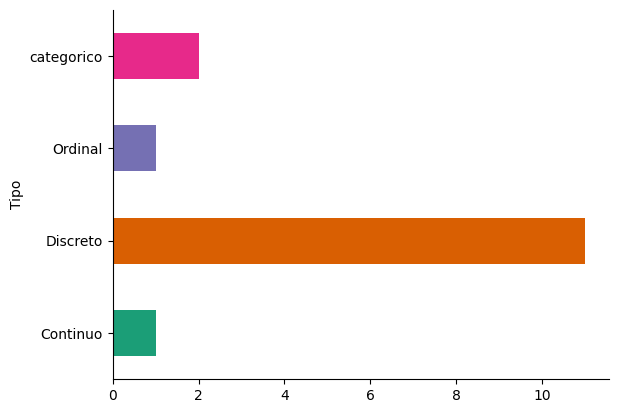

In [ ]:
# @title Tipo

from matplotlib import pyplot as plt
import seaborn as sns
clasificacion_variables.groupby('Tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

El predominio de variables **discretas** sugiere que gran parte del análisis estará enfocado en **cuentas y frecuencias** (por ejemplo, número de kills, MVPs, o rondas ganadas).




---

ahora si empezamos con algo mas complejo

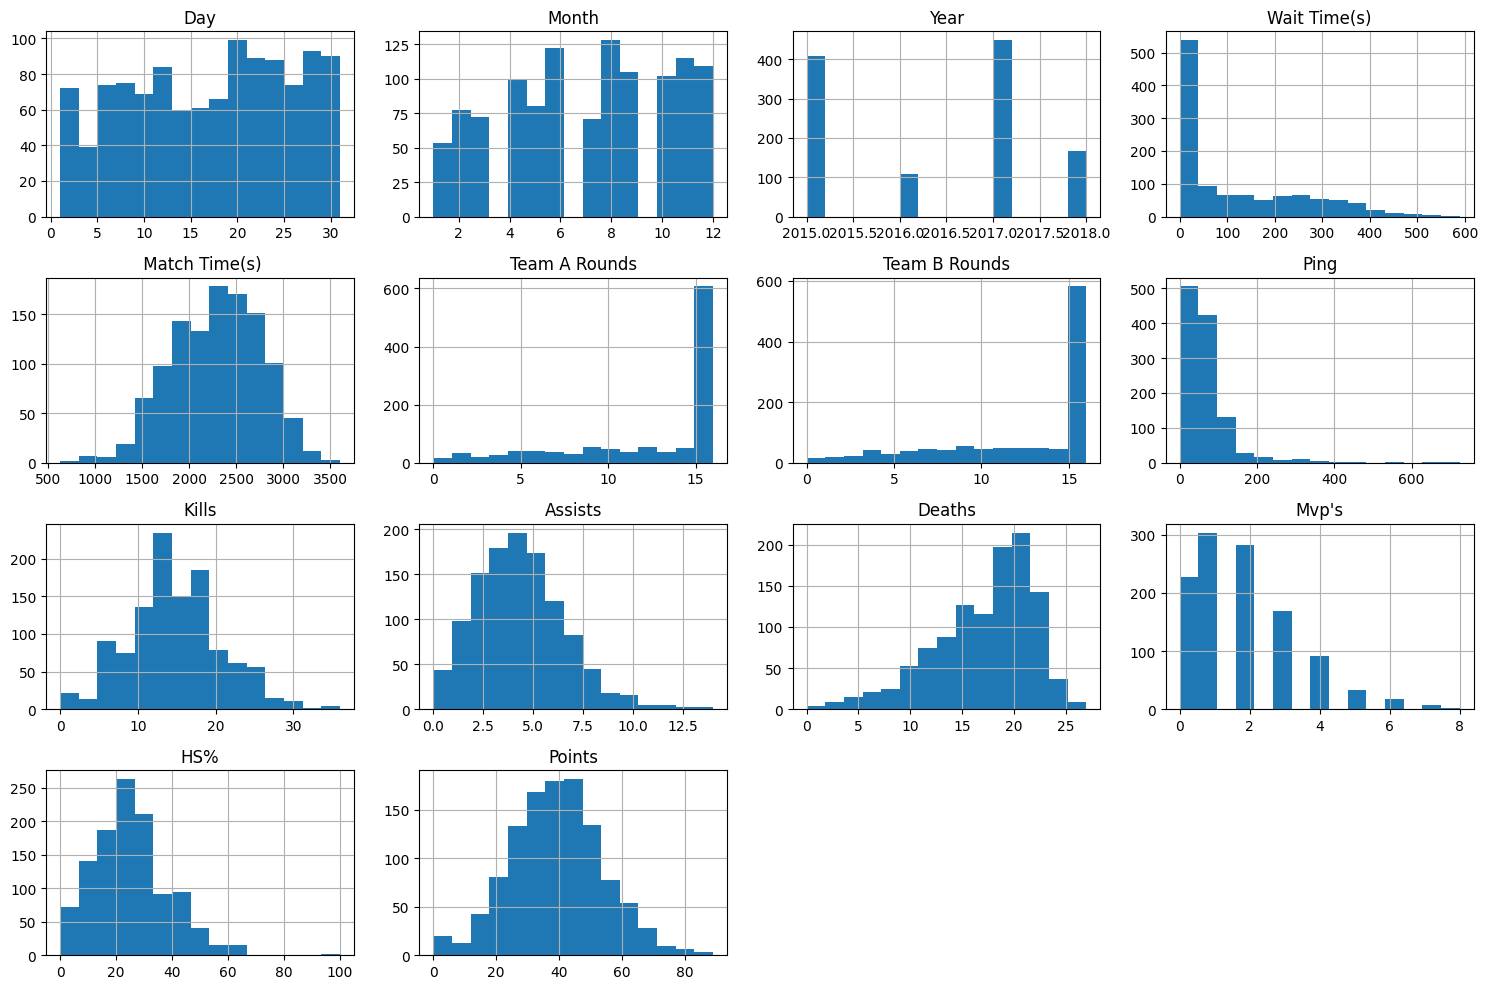

In [ ]:
#visualizacion de desviacion estandar de las columnas del dataset
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

####  Tiempos
- **Wait Time (s)** y **Ping** tienen una distribución **sesgada a la derecha** (asimetría positiva), indicando que la mayoría de los valores son bajos, pero existen algunos valores significativamente más altos (posibles outliers).
- **Match Time (s)** muestra una distribución aproximadamente **normal**, centrada alrededor de los 2500 segundos (~41 minutos).

####  Estadísticas de Juego
- **Kills**, **Assists**, **Deaths**, y **Points** presentan distribuciones en forma de **campana** o cercanas a la normal, lo que sugiere que estos eventos tienen un comportamiento central con cierta variabilidad.
- **MVP’s** está **sesgada a la derecha**, ya que la mayoría de los jugadores logran pocos MVPs por partida.
- **HS% (headshot percentage)** muestra una **asimetría negativa moderada**, con más frecuencia en valores entre 20% y 40%.

####  Rondas de Equipos
- **Team A Rounds** y **Team B Rounds** presentan una distribución **altamente concentrada en 15**, probablemente porque 15 es el máximo de rondas ganadas antes del cambio de lado (o una partida completa).

#### Variables Temporales
- **Day**, **Month**, y **Year** tienen distribuciones esperadas:
  - **Day** y **Month** se ven relativamente uniformes.
  - **Year** muestra que la mayoría de los datos se concentran en ciertos años (posiblemente 2016 y 2017).

---




Como son demasiados mapas crearemos otra columna dentro del dataset que se llame "Fmap" (Frecuencia de mapa)

In [ ]:
map_counts = df['Map'].value_counts()
print(map_counts)

Map
Dust II        547
Mirage         363
Inferno        132
Cache           59
Overpass        13
Cobblestone     12
Nuke             4
Austria          1
Canals           1
Italy            1
Name: count, dtype: int64


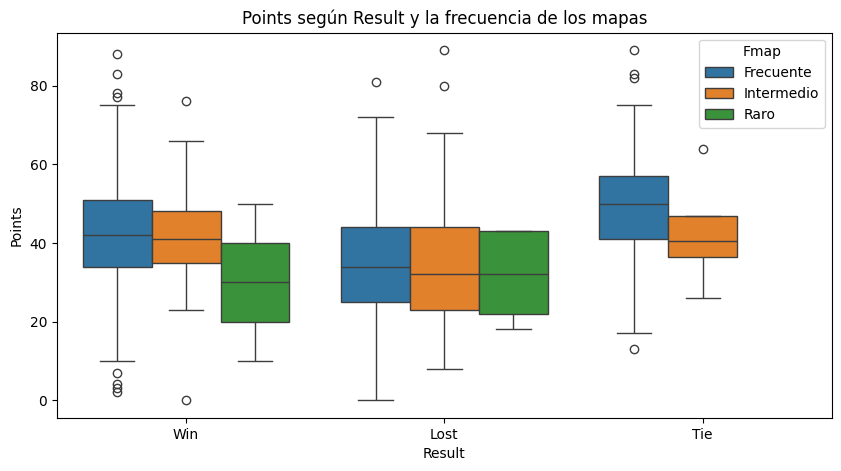

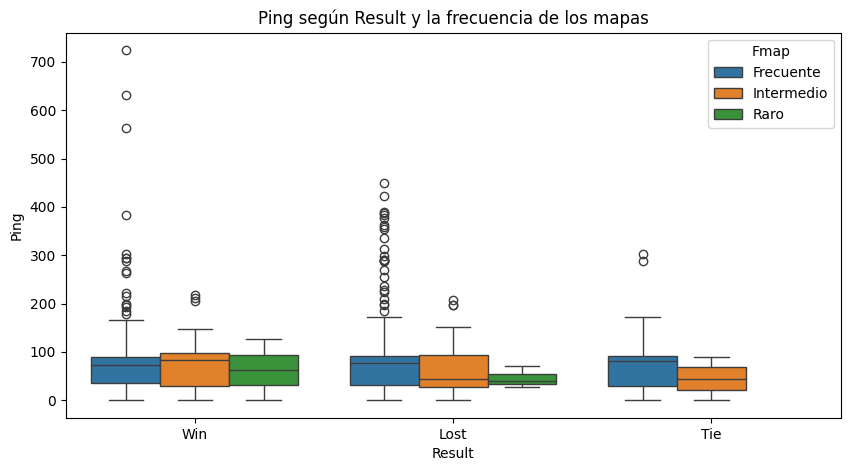

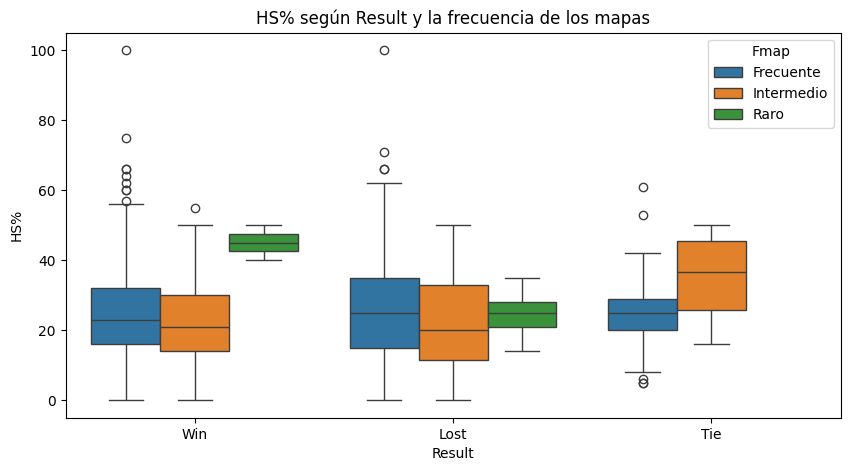

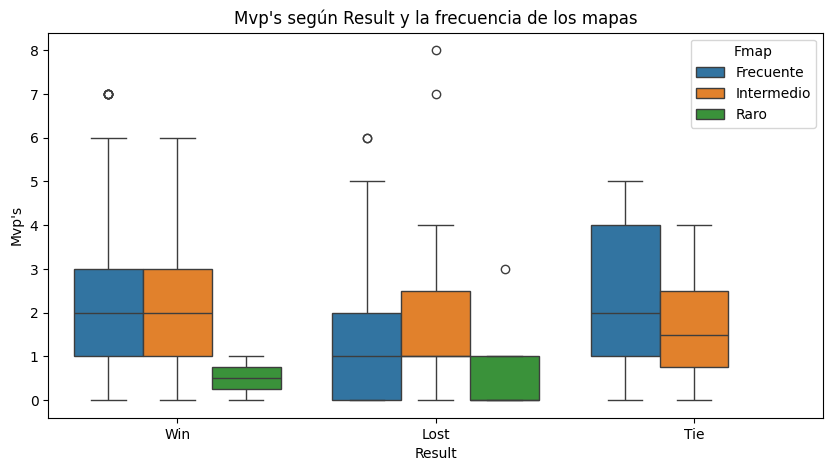

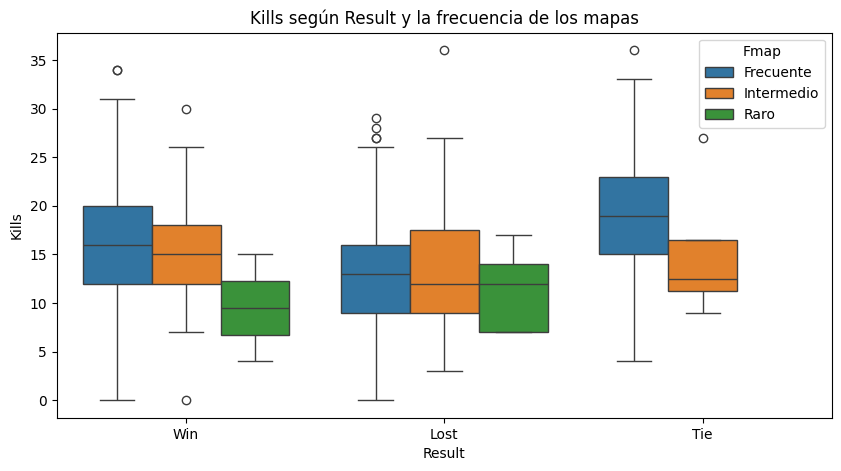

In [ ]:
def map_category(map_name):
    count = map_counts[map_name]
    if count >= 100:
      return 'Frecuente'
    elif count >= 10:
      return 'Intermedio'
    else:
      return 'Raro'

df['Fmap'] = df['Map'].apply(map_category)

variables = ["Points", "Ping", "HS%", "Mvp's", "Kills"]

for var in variables:
    plt.figure(figsize=(10, 5,))
    sns.boxplot(x='Result', y=var, hue='Fmap', data=df)
    plt.title(f'{var} según Result y la frecuencia de los mapas')
    plt.show()

###  Observaciones Clave

- En general, los jugadores obtienen más puntos en partidas **ganadas (`Win`)**, especialmente en **mapas frecuentes**, lo cual es coherente con un mejor rendimiento en entornos conocidos.
- Los **mapas raros** muestran medianas más bajas y mayor dispersión, lo que podría reflejar menos familiaridad, menor rendimiento o mayor variabilidad.
- En mapas **intermedios**, los puntos tienden a situarse entre los mapas frecuentes y los raros, tanto en partidas ganadas como perdidas.
- En partidas **empatadas (`Tie`)**, los mapas frecuentes siguen mostrando una mayor mediana de puntos, incluso más alta que en victorias. Esto podría reflejar partidas reñidas con alto rendimiento individual.

Este gráfico sugiere que la **frecuencia de los mapas influye en el rendimiento**, medido por los puntos obtenidos. Jugar en mapas más conocidos se asocia con un rendimiento más alto, mientras que los mapas menos jugados tienden a resultados más bajos y variables.

Este tipo de visualización es útil para:

- **Evaluar impacto del entorno** (mapa) en el desempeño.
- **Identificar relaciones entre variables categóricas y numéricas**.
- **Informar estrategias de entrenamiento**, enfocándose en mapas menos frecuentes.


Lo que se le hizo al dataset fue agregarle otra columna donde se agrupan los mapas por la frecuencia de cada uno de estos, para simplificar los analisis y visualizaciones.

---

###Datos estadisticos:

In [ ]:
#Datos estadisticos
col = ["Team A Rounds", "Team B Rounds",        "Ping", "Kills", "Assists",     "Deaths",       "Mvp's", "HS%", "Points"]

estadisticas = {
    'Media': df[col].mean(),
    'Mediana': df[col].median(),
    'Desviación estándar': df[col].std(),
    'Mínimo': df[col].min(),
    'Máximo': df[col].max()
}
pd.DataFrame(estadisticas)

,Media,Mediana,Desviación estándar,Mínimo,Máximo
Team A Rounds,12.393645,15.0,4.539815,0,16
Team B Rounds,12.269197,15.0,4.509403,0,16
Ping,72.494263,76.0,65.995966,0,724
Kills,14.706090,14.0,5.948775,0,36
Assists,4.158870,4.0,2.363482,0,14
Deaths,17.034422,18.0,4.792483,0,27
Mvp's,1.825243,2.0,1.487699,0,8
HS%,24.902030,23.0,13.672214,0,100
Points,39.217123,39.0,14.898022,0,89


- **Media (Mean)**:  
  Es el promedio de los valores.  
  *Ejemplo:* El promedio de **Kills** por partida es **14.7**, lo que indica el valor típico que un jugador obtiene en una partida.

- **Mediana (Median)**:  
  Es el valor central cuando los datos están ordenados. Si la mediana es muy diferente de la media, puede indicar una distribución sesgada o la presencia de valores atípicos.  
  *Ejemplo:* Para **Team A Rounds** y **Team B Rounds**, la mediana es **15**, mientras que la media es aproximadamente **12.3 / 12.2**, lo que sugiere que muchas partidas terminan con un equipo ganando las 15 rondas necesarias para el cambio de lado, pero hay también resultados con menos rondas que bajan el promedio.

- **Desviación estándar (Standard Deviation)**:  
  Mide qué tan dispersos están los datos respecto a la media.  
  - **Alta desviación estándar**: los valores están muy dispersos.  
  - **Baja desviación estándar**: los valores están agrupados cerca de la media.  
  *Ejemplo:* **Ping** tiene una desviación estándar alta (**~66 ms**), lo que indica una variabilidad considerable en la calidad de conexión entre jugadores.

- **Mínimo (Minimum)**:  
  Es el valor más bajo registrado en la columna. Útil para detectar valores extremos bajos o errores en los datos.

- **Máximo (Maximum)**:  
  Es el valor más alto registrado en la columna. Ayuda a identificar posibles valores atípicos o desempeños excepcionales.

---

Estas estadísticas son fundamentales para obtener una primera impresión del comportamiento de los datos y para detectar posibles problemas o patrones interesantes antes de aplicar modelos o visualizaciones más avanzadas.

**MAPA DE CORRELACIONES**

Con este mapa podremos identificar de mejor manera los factores de riesgo y priorizar cuales son las variables usar en el modelado

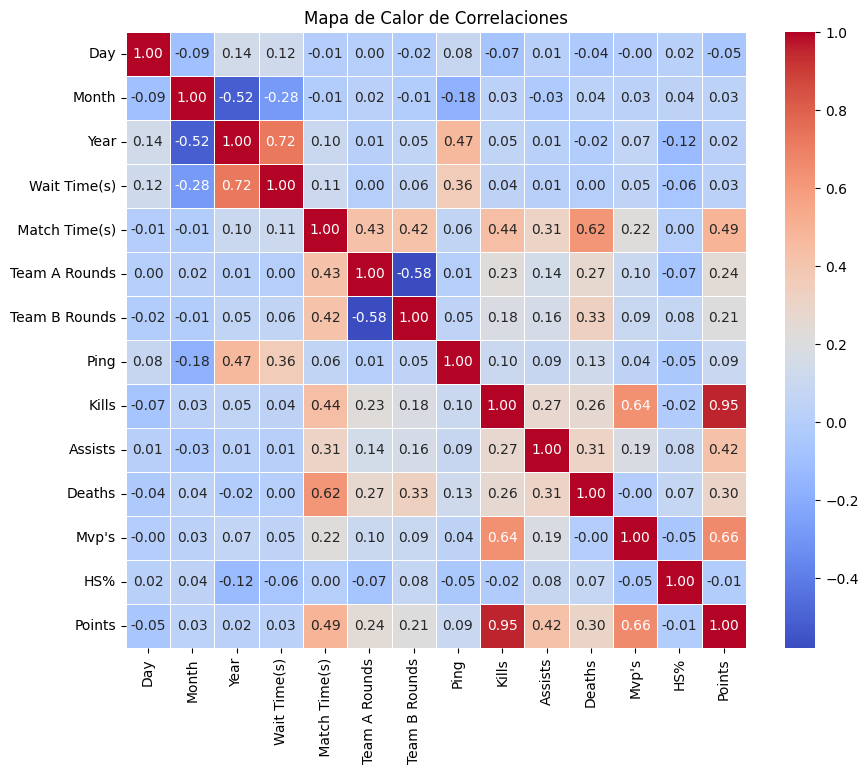

In [ ]:
orden_columnas = ["Team A Rounds", "Team B Rounds",	"Ping",	"Kills",	"Assists",	"Deaths",	"Mvp's",	"HS%",	"Points"]


columnas_numericas = df.select_dtypes(include=['number'])


correlacion = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


-  **`Points` está altamente correlacionado con `Kills` (0.95)**:  
  Esto indica que la cantidad de kills es el mayor determinante del puntaje total. También muestra correlaciones positivas notables con `Mvp's` (0.66) y `Assists` (0.42).

-  **`Kills` y `Mvp's` (0.64)**:  
  Un número alto de kills suele estar asociado a ser el jugador más valioso.

-  **`Match Time (s)`** muestra correlaciones positivas con:
  - `Deaths` (0.62)
  - `Kills` (0.44)
  - `Points` (0.49)  
  Esto sugiere que en partidas más largas, los jugadores tienden a acumular más estadísticas.

-  **`Ping` tiene baja correlación con las demás variables**:  
  Aunque se esperaba que pudiera afectar el rendimiento, no parece tener impacto fuerte sobre `Kills`, `Points`, ni `Deaths`.

-  **`Team A Rounds` y `Team B Rounds` tienen correlación negativa entre sí (-0.58)**:  
  Esto es lógico, ya que cuando un equipo gana más rondas, el otro necesariamente gana menos.

## FASE 3: DATA PREPARATION

Lo que haremos a continuacion una vez de entender los datos, es poder modificar algunas variables, en este caso modificaremos la variable RESULT, ya que es nuestra variable TARGET.

Atencion hay 2 lineas de codigo, la variable result es categorica, una linea de codigo reemplaza los datos ya existentes en la variable result, y la otra mantiene la columna original pero crea otra con los datos numerico.

Win = 0, Tie = 1, Lost = 2

In [ ]:
#CREA UNA NUEVA COLUMNA
Nresult = {'Win': 0, 'Tie': 1, 'Lost': 2}
df['Nresult'] = df['Result'].map(Nresult)


In [ ]:
#REEMPLAZA DIRECTAMENTE EN LA NUEVA COLUMNA
df['Result'] = df['Result'].map({'Win': 0, 'Tie': 1, 'Lost': 2})

In [ ]:
# Eliminar espacios en blanco al inicio o fin de cada nombre de columna
df.columns = df.columns.str.strip()

In [ ]:
# Seleccionar las variables de entrada (features) basadas en la correlación con 'Points' y la columna 'Map'
features = ['Kills', "Mvp's", 'Assists', 'Deaths', 'HS%', 'Map']
target = 'Points'

X = df[features]
y = df[target]

print("Variables de entrada (X):")
display(X.head())
print("\nVariable objetivo (y):")
display(y.head())

Variables de entrada (X):


,Kills,Mvp's,Assists,Deaths,HS%,Map
0,17,2,2,21,5,Mirage
1,13,2,4,24,0,Mirage
2,15,3,3,18,26,Mirage
3,12,2,2,15,16,Mirage
4,33,5,5,20,30,Mirage



Variable objetivo (y):


,Points
0,45
1,40
2,37
3,30
4,83


##  Agrupación de Mapas Poco Frecuentes

Durante el análisis exploratorio, se detectó que la mayoría de las partidas se concentran en **unos pocos mapas populares**, como:

- **Dust II**
- **Inferno**
- **Mirage**

Mientras tanto, otros mapas aparecen **muy pocas veces**, lo que puede generar **problemas** al codificarlos:

###  Problemas de mantener todos los mapas como categorías individuales:

- **Alta dimensionalidad** al aplicar OneHotEncoder (cada mapa se convierte en una columna).
- **Sparsidad** en los datos (muchas columnas con ceros).
- **Sobreajuste**: el modelo puede aprender patrones espurios de mapas raros que no se generalizan bien.

---

In [ ]:
# Agrupar mapas con baja frecuencia como "Otros"
umbral_frecuencia = 50  # Puedes ajustar este valor
map_counts = df['Map'].value_counts()
mapas_frecuentes = map_counts[map_counts >= umbral_frecuencia].index

# Reemplazar mapas poco frecuentes por 'Otros'
df['Map'] = df['Map'].apply(lambda m: m if m in mapas_frecuentes else 'Otros')

# Verificar resultado
print("Mapas finales considerados:")
print(df['Map'].value_counts())

Mapas finales considerados:
Map
Dust II    547
Mirage     363
Inferno    132
Cache       59
Otros       32
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separar columnas numéricas y categóricas
numerical_features = [col for col in features if col != 'Map']
categorical_features = ['Map']

# Preprocesamiento: escalar numéricas, codificar categóricas
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

Se optó por agrupar los mapas con baja frecuencia como "Otros", conservando únicamente los mapas que tienen al menos 50 partidas registradas.

---

ahora vamos a dividir el dataset para el entranamiento de los modelos
seleccionados
- **Conjunto de entrenamiento (80%)**: se utiliza para ajustar los parámetros del modelo.
- **Conjunto de prueba (20%)**: se reserva para evaluar el rendimiento del modelo en datos no vistos.

In [ ]:
from sklearn.model_selection import train_test_split

# División de los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Con esto hemos dejado los datos listos para aplicar nuestros modelos de regresión.
--

## Fase: Modeling

En esta fase aplicamos dos modelos de regresión para predecir el puntaje (`Points`) de los jugadores en partidas de CSGO:

1. **Regresión Lineal Múltiple**
2. **Árbol de Decisión para Regresión**

Ambos modelos fueron vistos en clases y se compararán mediante métricas estándar: **RMSE** (error cuadrático medio) y **R²** (coeficiente de determinación).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear pipeline con preprocesamiento + modelo
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar modelo
lr_pipeline.fit(X_train, y_train)

# Predecir
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluación
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Regresión Lineal Múltiple:")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.3f}")

Regresión Lineal Múltiple:
RMSE: 3.73
R²: 0.932


Los resultados de la Regresión Lineal Múltiple sugieren que el modelo entrenado es muy bueno prediciendo los puntos que un jugador obtendrá en una partida de CS:GO, basándose en las variables que seleccionaste. El bajo RMSE y el alto R² son indicadores positivos de su rendimiento predictivo

## Árbol de Decisión para Regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Árbol ajustado para evitar sobreajuste
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=42))
])

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_r2 = r2_score(y_test, y_pred_tree)

print("Árbol de Decisión (ajustado):")
print(f"RMSE: {tree_rmse:.2f}")
print(f"R²: {tree_r2:.3f}")

Árbol de Decisión (ajustado):
RMSE: 5.12
R²: 0.872


Al comparar el Árbol de Decisión con la Regresión Lineal Múltiple, observamos que la Regresión Lineal tuvo un mejor rendimiento en el conjunto de prueba, con un RMSE más bajo y un R² más alto. Esto sugiere que, para este problema particular y con las características seleccionadas, el modelo lineal fue más efectivo para capturar la relación entre las variables de entrada y los puntos obtenidos.

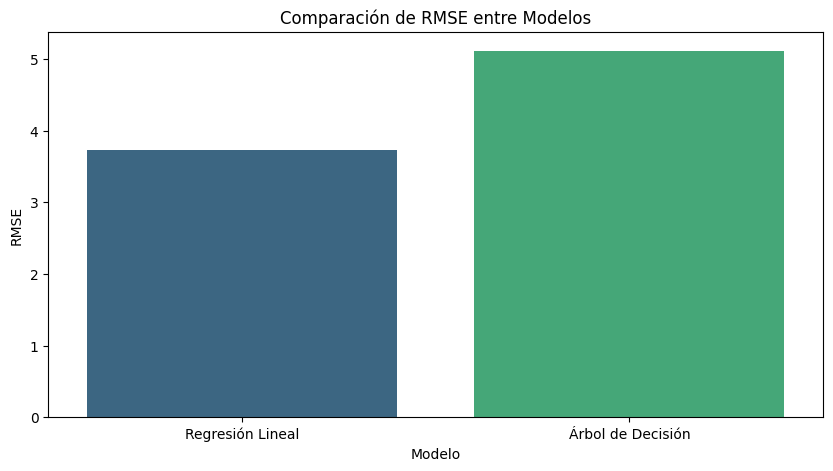

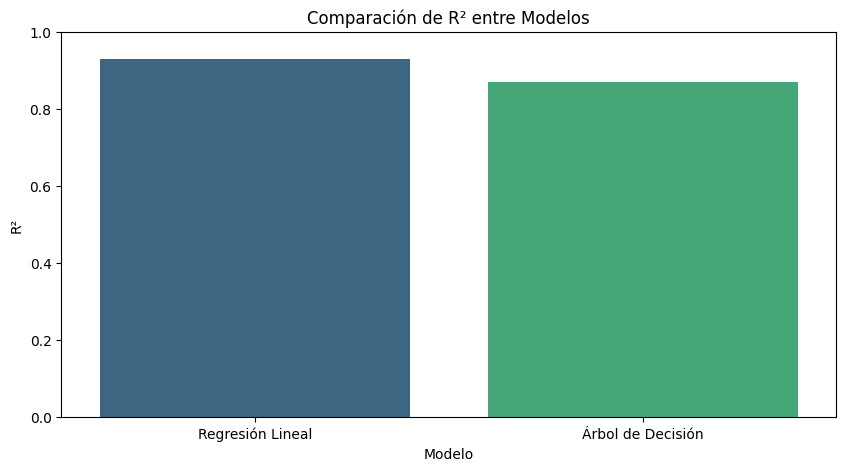

In [ ]:
# Crear un DataFrame para comparar las métricas
modelos = ['Regresión Lineal', 'Árbol de Decisión']
rmse_valores = [lr_rmse, tree_rmse]
r2_valores = [lr_r2, tree_r2]

comparacion_df = pd.DataFrame({
    'Modelo': modelos,
    'RMSE': rmse_valores,
    'R²': r2_valores
})

# Gráfico de barras para comparar RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='RMSE', data=comparacion_df, palette='viridis')
plt.title('Comparación de RMSE entre Modelos')
plt.ylabel('RMSE')
plt.show()

# Gráfico de barras para comparar R²
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='R²', data=comparacion_df, palette='viridis')
plt.title('Comparación de R² entre Modelos')
plt.ylabel('R²')
plt.ylim(0, 1) # R2 values are between 0 and 1
plt.show()

## Comparación de Modelos de Regresión

Hemos evaluado dos modelos de regresión para predecir los **Puntos** (`Points`) de los jugadores basándonos en las características seleccionadas:

1.  **Regresión Lineal Múltiple**
2.  **Árbol de Decisión para Regresión (ajustado)**

A continuación, se presentan las métricas de rendimiento obtenidas en el conjunto de prueba:

| Modelo                       | RMSE | R²    |
| :--------------------------- | :--- | :---- |
| Regresión Lineal Múltiple    | 3.73 | 0.932 |
| Árbol de Decisión (ajustado) | 5.12 | 0.872 |



ahora con el modelado finalizado, pasaremos a la fase de evaluación del modelo



---

# FASE 5: Evaluación

En esta fase analizamos en detalle el rendimiento de los dos modelos aplicados: Regresión Lineal Múltiple y Árbol de Decisión.

Se utilizaron las siguientes métricas:

- **RMSE (Root Mean Squared Error)**: mide el error promedio en las predicciones.
- **R² (Coeficiente de determinación)**: mide qué tan bien el modelo explica la variación del target (`Points`).

Además, realizamos visualizaciones para comparar los valores reales vs. los predichos.

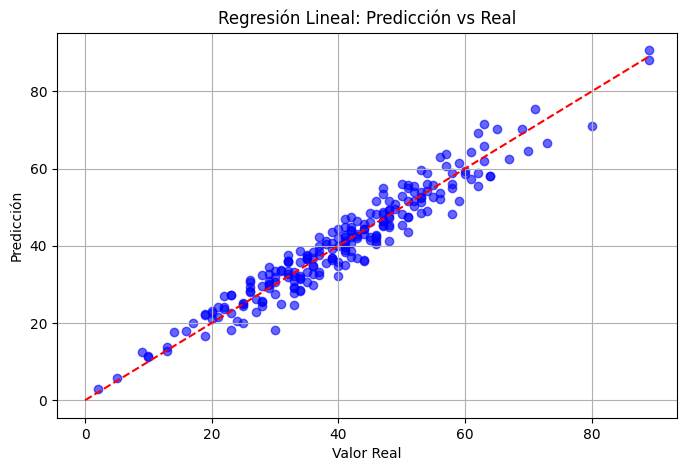

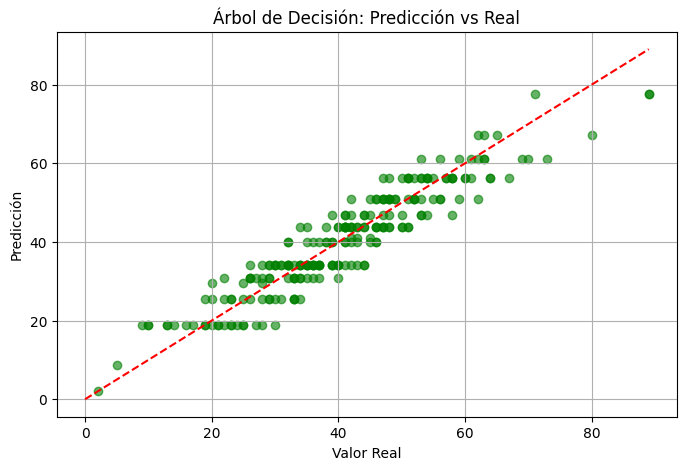

In [ ]:
import matplotlib.pyplot as plt

# Regresión Lineal
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Regresión Lineal: Predicción vs Real")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.grid(True)
plt.show()

# Árbol de Decisión
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Árbol de Decisión: Predicción vs Real")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.grid(True)
plt.show()



Observando los gráficos de dispersión de Predicción vs. Real:

*   **Regresión Lineal Múltiple**: Los puntos se agrupan **muy cerca de la línea diagonal roja**, lo que indica que las predicciones del modelo lineal son **altamente precisas** y se ajustan bien a los valores reales. Esto visualiza el alto R² y bajo RMSE.

*   **Árbol de Decisión**: Los puntos muestran **mayor dispersión** alrededor de la línea diagonal en comparación con la Regresión Lineal. Aunque sigue la tendencia, las predicciones son **menos precisas** en promedio. Esto es coherente con su menor R² y mayor RMSE.

 La Regresión Lineal Múltiple muestra un ajuste visualmente superior a los datos, con predicciones más cercanas a los valores reales que el Árbol de Decisión.

### Comparación Visual de Predicción para un Jugador Específico

Se visualiza el puntaje (`Points`) estimado para un jugador específico, seleccionado aleatoriamente del dataset real, utilizando ambos modelos entrenados:

*   **Regresión Lineal Múltiple**
*   **Árbol de Decisión para Regresión**

**(Insertar aquí la salida del código que muestra el jugador de ejemplo y las predicciones)**

**Interpretación de la Predicción de Ejemplo:**

*   Para el jugador seleccionado, ambos modelos predijeron puntajes muy cercanos: **{pred_lr:.2f} puntos** por la Regresión Lineal y **{pred_tree:.2f} puntos** por el Árbol de Decisión.
*   En este caso particular, ambos modelos clasificaron al jugador de manera similar según el umbral de 50 puntos (mostrando `✅ Buen jugador` o `❌ mal jugador`).
*   La pequeña diferencia entre las predicciones de los modelos para este jugador de ejemplo refuerza la consistencia en sus resultados, aunque la evaluación general mostró que la Regresión Lineal fue ligeramente superior en el conjunto de prueba.

Esta demostración visual de la predicción es útil para:

*   Validar la capacidad de los modelos para generar puntajes coherentes para un jugador individual.
*   Ilustrar de manera concreta cómo se usarían los modelos para predecir el rendimiento en la práctica.

Esta funcionalidad podría ser la base para una herramienta que evalúe o pronostique el rendimiento de jugadores en CS:GO, permitiendo quizás ingresar datos de un jugador para obtener una estimación de sus puntos esperados en una partida.

---

en el siguiente codigo, traemos datos aleatorios del mismo dataset para predecir si el jugador es bueno o malo, con el umbral de 50 puntos,

In [ ]:
import random
# Elegir una fila aleatoria del dataset real
fila_aleatoria = df.sample(1, random_state=random.randint(0, 999)).copy()

# Guardar solo las columnas necesarias para el modelo
# Nota: Aquí usamos las columnas que el modelo espera como input,
# que son las mismas que usamos para X_train/X_test
columnas_modelo = ['Kills', "Mvp's", 'Assists', 'Deaths', 'HS%', 'Map']


df_jugador = fila_aleatoria[columnas_modelo]

# Predicción con ambos modelos
# Se usa .predict() en el pipeline, que aplica el preprocesamiento automáticamente
pred_lr = lr_pipeline.predict(df_jugador)[0]
pred_tree = tree_pipeline.predict(df_jugador)[0]

# Clasificación según umbral
umbral = 50
clas_lr = "✅ Buen jugador" if pred_lr >= umbral else "❌ mal jugador"
clas_tree = "✅ buen jugador" if pred_tree >= umbral else "❌ mal jugador"

# Mostrar resultados
print("🎲 Jugador tomado del dataset real:")
print(df_jugador.to_string(index=False))
print("\n🔍 Predicción de Puntaje:")
print(f"- Regresión Lineal Múltiple: {pred_lr:.2f} puntos → {clas_lr}")
print(f"- Árbol de Decisión:         {pred_tree:.2f} puntos → {clas_tree}")

🎲 Jugador tomado del dataset real:
 Kills  Mvp's  Assists  Deaths  HS%     Map
     1      0        2       0  100 Dust II

🔍 Predicción de Puntaje:
- Regresión Lineal Múltiple: 4.53 puntos → ❌ mal jugador
- Árbol de Decisión:         2.06 puntos → ❌ mal jugador


---

el el siguiente bloque de de codigo es similar al anterior pero este no trae datos de dataset, sino más bien los genere de forma aleatoria utilizando random.randint

In [ ]:
import random
import pandas as pd

# Mapas después de agrupar: los frecuentes más 'Otros'
mapas_disponibles = ['Dust II', 'Inferno', 'Mirage', 'Otros']

# Crear datos aleatorios realistas
jugador_random = {
    'Map': random.choice(mapas_disponibles),
    'Wait Time(s)': random.randint(5, 60),
    'Match Time(s)': random.randint(600, 1800),
    'Team A Rounds': random.randint(0, 16),
    'Team B Rounds': random.randint(0, 16),
    'Ping': random.randint(20, 100),
    'Kills': random.randint(0, 40),
    'Assists': random.randint(0, 10),
    'Deaths': random.randint(0, 30),
    "Mvp's": random.randint(0, 10),
    'HS%': random.randint(0, 100)
}

# Convertir a DataFrame
df_random = pd.DataFrame([jugador_random])

# Predicción con ambos modelos
pred_lr = lr_pipeline.predict(df_random)[0]
pred_tree = tree_pipeline.predict(df_random)[0]

# Clasificación según umbral (ej: 50 puntos)
umbral = 50
clas_lr = "✅ Buen jugador" if pred_lr >= umbral else "❌ mal jugador"
clas_tree = "✅ buen jugador" if pred_tree >= umbral else "❌ mal jugador"

# Mostrar resultados
print("🎲 Jugador aleatorio generado:")
print(df_random.to_string(index=False))
print("\n🔍 Predicción de Puntaje:")
print(f"- Regresión Lineal Múltiple: {pred_lr:.2f} puntos → {clas_lr}")
print(f"- Árbol de Decisión:         {pred_tree:.2f} puntos → {clas_tree}")


🎲 Jugador aleatorio generado:
    Map  Wait Time(s)  Match Time(s)  Team A Rounds  Team B Rounds  Ping  Kills  Assists  Deaths  Mvp's  HS%
Inferno            48           1745              5              1    50     20        9      19      1   90

🔍 Predicción de Puntaje:
- Regresión Lineal Múltiple: 53.81 puntos → ✅ Buen jugador
- Árbol de Decisión:         50.86 puntos → ✅ buen jugador


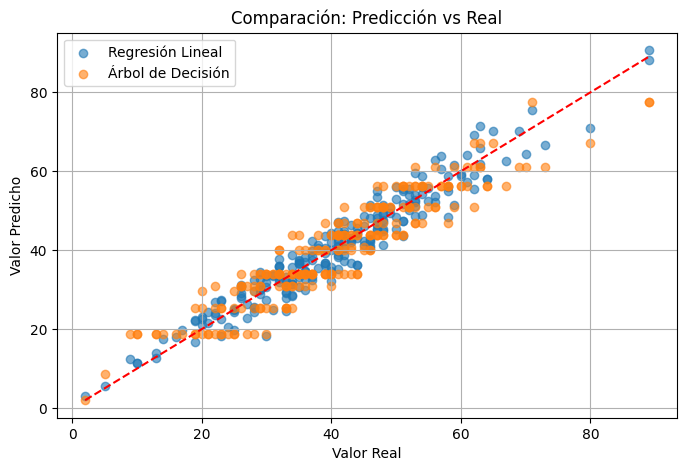

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label='Regresión Lineal', alpha=0.6)
plt.scatter(y_test, y_pred_tree, label='Árbol de Decisión', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Comparación: Predicción vs Real")
plt.legend()
plt.grid(True)
plt.show()

Este gráfico muestra las predicciones de ambos modelos (Regresión Lineal en azul, Árbol de Decisión en verde) frente a los valores reales. La línea diagonal roja representa la predicción perfecta.

*   Los puntos azules (Regresión Lineal) se agrupan más cerca de la línea roja que los puntos verdes (Árbol de Decisión).
*   Esto significa que las predicciones de la Regresión Lineal están, en promedio, más cerca de los valores reales que las del Árbol de Decisión.

En resumen, el gráfico confirma visualmente que el modelo de Regresión Lineal tuvo un mejor rendimiento predictivo que el Árbol de Decisión en este conjunto de datos.

## **FASE: Deployment**

### **Implementación y Aplicación Práctica**

Los resultados obtenidos en el análisis exploratorio y el modelado predictivo nos permiten identificar patrones clave que influyen en el rendimiento de los jugadores de CS:GO. Estos hallazgos tienen aplicaciones prácticas para mejorar estrategias individuales y de equipo.

#### **Principales Hallazgos y su Impacto**

1. **KDA como Indicador Clave**
   - Se confirmó una correlación significativa entre el ratio Kills/Deaths/Assists (KDA) y la probabilidad de victoria
   - Jugadores con valores altos en estas métricas tienen mayor impacto en el resultado
   - *Aplicación:* Puede usarse como métrica objetiva para evaluar desempeño individual

2. **Influencia del Mapa**
   - Algunos mapas mostraron ventajas estratégicas para ciertos equipos
   - *Aplicación:* La selección de mapas puede optimizarse en torneos competitivos

3. **Efecto del Ping**
   - Valores altos de ping (latencia) están asociados con menor rendimiento
   - *Aplicación:* Resalta la importancia de conexiones estables en competencias

#### **Próximos Pasos**

Estos insights podrían implementarse en:
- Herramientas de análisis para equipos profesionales
- Plataformas de entrenamiento personalizado
- Dashboards interactivos para seguimiento en tiempo real

**Conclusión Final:**
El modelo desarrollado valida hipótesis comunes en la comunidad de CS:GO y proporciona un marco cuantitativo para:
- Optimizar estrategias de juego
- Mejorar la preparación competitiva
- Tomar decisiones basadas en datos